In [19]:
from PIL import Image, ImageOps
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2 as cv

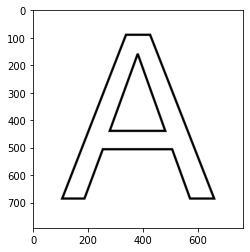

In [20]:
path = 'a.jpg'
img = Image.open(path)
img = ImageOps.grayscale(img)
img = np.array(img)
plt.imshow(img, cmap='gray')

In [21]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [22]:
height = img.shape[0] * 2
width = img.shape[1] * 2
share1 = np.zeros((height, width), dtype=np.uint8)
share2 = np.zeros((height, width), dtype=np.uint8)

share1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [40]:
sharei = 0
sharej = 0
c0 = [[[0, 255], [0, 255]], [[255, 0], [255, 0]]]
c1 = [[[0, 255], [0, 255]], [[255, 0], [255, 0]]]

for i in range(len(img)):
    sharej = 0
    for j in range(len(img[0])):
        rand = random.randint(0, 1)
        if img[i][j] == 255:
            share1[sharei:(sharei + 2),sharej:(sharej+2)] = c0[rand]
            share2[sharei:(sharei + 2),sharej:(sharej+2)] = c0[rand]   
        else:
            if rand == 0:
                share1[sharei:(sharei + 2),sharej:(sharej+2)] = c1[0]
                share2[sharei:(sharei + 2),sharej:(sharej+2)] = c1[1]
            elif rand == 1:
                share1[sharei:(sharei + 2),sharej:(sharej+2)] = c1[1]
                share2[sharei:(sharei + 2),sharej:(sharej+2)] = c1[0]
        sharej += 2
    sharei += 2

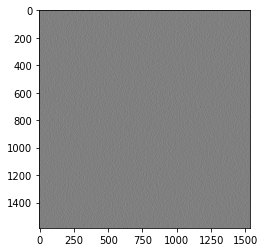

In [41]:
plt.imshow(share1, cmap='gray')

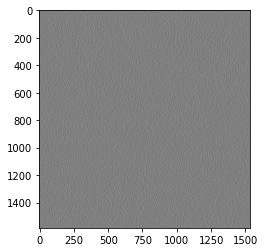

In [42]:
plt.imshow(share2, cmap='gray')

In [43]:
for i in range(len(share1)):
    for j in range(len(share1[0])):
        if share1[i][j] == 0:
            share2[i][j] = 0

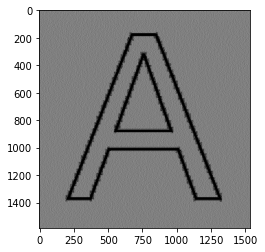

In [44]:
cv.imwrite('result.jpg', share2)
plt.imshow(share2, cmap='gray')